In [7]:
%matplotlib inline
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import ipyplot
from PIL import Image

## MNIST grayscale example

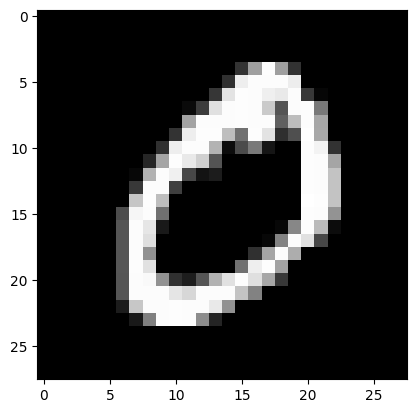

In [127]:
dataset = torchvision.datasets.MNIST("./.mnist")
# A zero
test_image = dataset.data[1]
test_image = test_image.to(torch.float32)
# test_image = torch.tensor(np.asarray(Image.open("./test.jpeg").resize((28, 28))))
plt.imshow(test_image, cmap="gray")
# test_image.size()

In [128]:
H = W = test_image.shape[0]         # Height and width
C = 1                               # Number of Channels
P = 8                               # Patch size
N = (H // P) ** 2                    # Number of patches
N

9

In [142]:
images = []
patches = test_image.unfold(0, P, P).unfold(1, P, P)
print(patches.size())

for i in range(patches.size()[0]):
    for j in range(patches.size()[1]):
        images.append(Image.fromarray(patches.to(torch.uint8).numpy()[i, j, :, :]))

print(f"Size of original data {dataset.data[1].size()} and size of unfolded data {patches.size()}")

torch.Size([3, 3, 8, 8])
Size of original data torch.Size([28, 28]) and size of unfolded data torch.Size([3, 3, 8, 8])


In [131]:
patches[0, 0, :, :]

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [143]:
ipyplot.plot_images(images, max_images=50)

/home/jorgen/.local/lib/python3.11/site-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))


In [144]:
flattened_patches = patches.flatten(2)
flattened_patches.size()

torch.Size([3, 3, 64])

In [145]:
position_embeddings = torch.randn(1, N)
position_embeddings.size()

torch.Size([1, 9])

In [149]:
test = torch.nn.Linear(64, 9, bias=False)
# print(flattened_patches.dtype)
linear_patch_embeddings = test(flattened_patches)
linear_patch_embeddings

tensor([[[   0.0000,    0.0000,    0.0000,    0.0000,    0.0000,    0.0000,
             0.0000,    0.0000,    0.0000],
         [ -22.0709,   12.5872,   64.6980,   45.6923,   50.8224,  -51.1901,
            52.9312,   11.5089,   22.6832],
         [   2.7431,  -75.1814,  -42.1329,   81.4721,  117.3938,   48.8622,
           -41.2696,  -42.9000,   13.3626]],

        [[ -36.0202,   23.3058,   17.2812,   36.7966,   33.1395,  -16.5257,
            34.3605,  -19.5885,   18.8611],
         [  62.6569,  -42.8170, -109.3069,   33.5263,  -93.7458,   -0.7487,
            77.7072,  -30.3775,   52.6084],
         [ 102.4134,  -89.0655,   43.9137,  -45.2142, -102.9921,  -15.4809,
            56.9540,  -99.5140,  -47.2109]],

        [[ -44.4275,   -6.8018,   24.1813,   56.0510,  -16.9044,   69.9250,
            91.3116,   24.2290,   48.8889],
         [ -28.9861,  -27.0891,   74.0871,  113.1814,  133.7324,   47.5315,
            -9.6143, -144.6507,  -17.0189],
         [  54.0343,   10.7910,  -57

In [148]:
linear_patch_embeddings += position_embeddings
linear_patch_embeddings

tensor([[[ 2.1681e+00, -9.1560e-01,  7.5195e-01, -1.7398e-02, -1.1265e+00,
          -3.6899e-01, -3.1546e+00, -3.2413e+00,  2.6382e+00],
         [ 1.7847e+01,  3.5772e+00, -6.9088e+01,  5.0837e+01, -2.7164e+01,
           4.3414e+01, -4.4587e+01, -3.7741e+01,  8.0519e+00],
         [-9.6653e+01,  4.8166e+01, -7.4453e+01, -3.6835e+01, -3.1868e+01,
          -4.0081e+01, -5.4641e+01, -1.7527e+01,  1.9651e+01]],

        [[-1.4088e+01, -1.0587e+01, -6.3537e+00,  3.3809e+01, -2.3360e+01,
           1.0868e+01, -1.7534e+01, -5.6562e+00,  1.1260e+01],
         [-4.4771e+01, -1.0498e+02, -2.8356e+01, -9.3086e+01, -1.2292e+01,
          -2.1799e+01, -5.0691e+01,  5.0848e+01, -4.2959e+01],
         [ 8.4868e+01, -5.5748e+01, -1.0510e+02,  9.8482e+00,  7.2669e+01,
           1.6685e+01,  2.5427e+01,  1.4515e+01, -1.7577e+01]],

        [[-2.5314e+01, -5.2861e+01, -6.8404e-01,  2.6226e+01, -2.9364e+01,
          -5.1419e+01, -3.0311e+01,  2.6561e+01,  6.8684e+00],
         [-5.9837e+01, -4.1501

## RGB Example

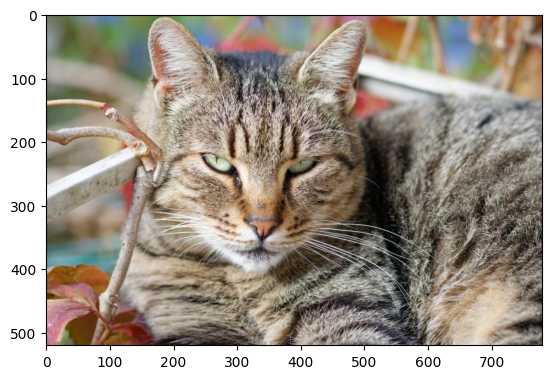

In [172]:
P = 16
image = np.asarray(Image.open("./cat.jpg"))
plt.imshow(image)

In [173]:
image = torch.tensor(image).to(torch.float32)
image_patches = image.unfold(0, P, P).unfold(1, P, P).unfold(2, 1, 1)
print(image_patches.size())

torch.Size([32, 48, 3, 16, 16, 1])


Patch same at row: 25 and col: 39


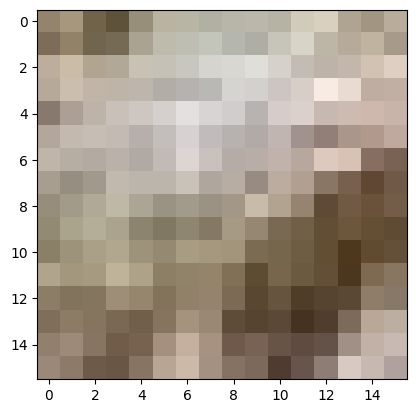

In [174]:
i = 25
j = 39
test_patch = image_patches[i, j, :, :, :, 0]
print(f"Patch same at row: {i} and col: {j}")
plt.imshow(test_patch.transpose(0, 2).to(torch.uint8))

In [179]:
flattened_image_patches = image_patches.flatten(2)
flattened_image_patches.size()

16

In [180]:
position_image_embeddings = torch.randn(1, P)
position_image_embeddings

tensor([[-1.2856, -0.8793,  1.4728,  0.3454,  1.3611,  0.4180,  1.1305, -0.8962,
         -0.9815,  0.7387,  0.8498, -1.2349,  0.2266, -0.0374, -1.8195,  0.2754]])

In [177]:
linear_layer = torch.nn.Linear(flattened_image_patches.size()[2], P)
linear_image_patches = linear_layer(flattened_image_patches)
linear_image_patches

tensor([[[  14.0870,  -81.8422,   16.4060,  ...,   45.9782,   -0.3188,
            -7.2479],
         [  11.1182,  -68.7060,   11.8866,  ...,   42.5981,    0.8985,
             0.1991],
         [  12.0190,  -62.7325,   15.3522,  ...,   53.4639,   -9.0145,
             3.2179],
         ...,
         [  28.7385,  -91.8759,   14.7773,  ...,   50.0014,    2.5618,
           -25.8618],
         [  35.1624, -128.5662,   23.9833,  ...,   31.2339,   -6.3713,
           -25.8596],
         [  23.6514, -110.2287,   17.9273,  ...,   62.6833,   16.2685,
           -22.7992]],

        [[  18.9225,  -85.7438,   20.3357,  ...,   69.6808,   -0.5956,
            -8.0007],
         [  11.7185,  -69.6995,   13.2359,  ...,   47.6819,    3.4266,
            -4.2394],
         [   7.5507,  -55.3295,    9.7073,  ...,   28.0832,   -3.6549,
             2.1180],
         ...,
         [  23.3467,  -97.0609,   16.1998,  ...,   27.7903,    6.8598,
           -30.5970],
         [  14.8671, -137.0804,   16.399

In [181]:
linear_image_patches += position_image_embeddings
linear_image_patches

tensor([[[ 1.2801e+01, -8.2722e+01,  1.7879e+01,  ...,  4.5941e+01,
          -2.1383e+00, -6.9725e+00],
         [ 9.8326e+00, -6.9585e+01,  1.3359e+01,  ...,  4.2561e+01,
          -9.2099e-01,  4.7452e-01],
         [ 1.0733e+01, -6.3612e+01,  1.6825e+01,  ...,  5.3426e+01,
          -1.0834e+01,  3.4933e+00],
         ...,
         [ 2.7453e+01, -9.2755e+01,  1.6250e+01,  ...,  4.9964e+01,
           7.4232e-01, -2.5586e+01],
         [ 3.3877e+01, -1.2945e+02,  2.5456e+01,  ...,  3.1197e+01,
          -8.1908e+00, -2.5584e+01],
         [ 2.2366e+01, -1.1111e+02,  1.9400e+01,  ...,  6.2646e+01,
           1.4449e+01, -2.2524e+01]],

        [[ 1.7637e+01, -8.6623e+01,  2.1809e+01,  ...,  6.9643e+01,
          -2.4151e+00, -7.7253e+00],
         [ 1.0433e+01, -7.0579e+01,  1.4709e+01,  ...,  4.7645e+01,
           1.6071e+00, -3.9640e+00],
         [ 6.2651e+00, -5.6209e+01,  1.1180e+01,  ...,  2.8046e+01,
          -5.4744e+00,  2.3934e+00],
         ...,
         [ 2.2061e+01, -9